In [ ]:
from sage.all import sigma, nth_prime
import pickle

prime_lst =[] # corrected prime list
for k in range(1, 501):
    prime_lst.append([k,nth_prime(k)])
    print(k)

with open('/Users/barrybrent/data/run10sept25no20.txt', 'wb') as wfile:
    pickle.dump(prime_lst, wfile) #output snipped

In [2]:
import pickle
with open('/Users/barrybrent/data/run10sept25no20.txt', 'rb') as rfile:
    h_list = pickle.load(rfile)
print(h_list[:10])

[[1, 2], [2, 3], [3, 5], [4, 7], [5, 11], [6, 13], [7, 17], [8, 19], [9, 23], [10, 29]]


In [ ]:
import pickle
with open('/Users/barrybrent/data/run10sept25no20.txt', 'rb') as rfile:
    h_list = pickle.load(rfile)
def h(n):
    return h_list[n][1]
j0=1
#j_lst=[(0,j0)] << from p_n 10sept25 I thought was correct but no
for n in range(0,len(h_list)):
    sm=0
    for r in [1..n-1]:
        sm=sm+j_lst[r][1]*h(n-r)
    jn=n*h(n)-sm
    j_lst+=[(n,jn)]
    print(n)

with open('/Users/barrybrent/data/run10sept25no21.txt', 'wb') as wfile:
    pickle.dump(j_lst, wfile) #output snipped

In [6]:
import pickle
with open('/Users/barrybrent/data/run10sept25no20.txt', 'rb') as rfile:
    h_list = pickle.load(rfile)
    for pair in h_list[:3]:
        print(pair)

[1, 2]
[2, 3]
[3, 5]


In [9]:
import pickle
with open('/Users/barrybrent/data/run10sept25no21.txt', 'rb') as rfile:
    j_list=pickle.load(rfile)
print("length j_list:",len(j_list))
for pair in j_list[:3]:
    print(pair)

length j_list: 501
(0, 1)
(0, 0)
(1, 3)


In [ ]:
import pickle
with open('/Users/barrybrent/data/run10sept25no20.txt', 'rb') as rfile:
    h_list = pickle.load(rfile)
def h(n):
    return h_list[n][1]
j_list=[]
for n in range(0,len(h_list)):
    sm=0
    for r in [1..n-1]:
        sm=sm+j_list[r][1]*h(n-r)
    j_n=n*h(n)-sm
    j_list+=[(n,j_n)]
    print(n)

with open('/Users/barrybrent/data/run28sept25no1.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) #output snipped

In [8]:
import pickle
Rx.<x>=PolynomialRing(QQ)
with open('/Users/barrybrent/data/run28sept25no1.txt', 'rb') as rfile:
    j_list=pickle.load(rfile)
j_values=[pair[1] for pair in j_list]
def J_matrix(j_values):
    n = len(j_values)
    J = matrix(QQ, n, n, 0)  # symbolic ring matrix

    for i in range(n):
        for j in range(n):
            # Construct matrix J
            if j == 0:
                J[i,j] = j_values[i]
            elif j == i + 1:
                J[i,j] = -(i + 1)  # superdiagonal: -1, -2, ...
            elif 1 <= j <= i:
                J[i,j] = j_values[i - j]
            else:
                J[i,j] = 0

    return J
for n in [1..3]:
    jl=j_values[:n]
    J = J_matrix(jl)
    print("J:")
    show(J)
    print("|J|:", J.det())
    cp=J.charpoly(x)
    print("characteristic polynomial:",cp)

J:


[0]

|J|: 0
characteristic polynomial: x
J:


[ 0 -1]
[ 3  0]

|J|: 3
characteristic polynomial: x^2 + 3
J:


[ 0 -1  0]
[ 3  0 -2]
[ 1  3  0]

|J|: 2
characteristic polynomial: x^3 + 9*x - 2


In [11]:
import pickle
Rx.<x>=PolynomialRing(QQ)
with open('/Users/barrybrent/data/run28sept25no1.txt', 'rb') as rfile:
    j_list=pickle.load(rfile)
j_values=[pair[1] for pair in j_list]
def J_matrix(j_values):
    n = len(j_values)
    J = matrix(QQ, n, n, 0)  # symbolic ring matrix

    for i in range(n):
        for j in range(n):
            # Construct matrix J
            if j == 0:
                J[i,j] = j_values[i]
            elif j == i + 1:
                J[i,j] = -(i + 1)  # superdiagonal: -1, -2, ...
            elif 1 <= j <= i:
                J[i,j] = j_values[i - j]
            else:
                J[i,j] = 0

    return J
cp_list=[]
for n in range(0,200):
    print("n:",n)
    jl=j_values[:n]
    J = J_matrix(jl)
    cp=J.charpoly(algorithm="linbox") # this linbox method is fast & efficient
    cp_list.append((n, cp))
    if n<9:
        print("---------------------------------------------------------------------------------------------------")
        print("j values:")
        print(jl)
        show(J)
with open('/Users/barrybrent/data/run28sept25no2.txt', 'wb') as wfile:
    pickle.dump(cp_list, wfile)

n: 0
---------------------------------------------------------------------------------------------------
j values:
[]


[]

n: 1
---------------------------------------------------------------------------------------------------
j values:
[0]


[0]

n: 2
---------------------------------------------------------------------------------------------------
j values:
[0, 3]


[ 0 -1]
[ 3  0]

n: 3
---------------------------------------------------------------------------------------------------
j values:
[0, 3, 1]


[ 0 -1  0]
[ 3  0 -2]
[ 1  3  0]

n: 4
---------------------------------------------------------------------------------------------------
j values:
[0, 3, 1, 3]


[ 0 -1  0  0]
[ 3  0 -2  0]
[ 1  3  0 -3]
[ 3  1  3  0]

n: 5
---------------------------------------------------------------------------------------------------
j values:
[0, 3, 1, 3, 9]


[ 0 -1  0  0  0]
[ 3  0 -2  0  0]
[ 1  3  0 -3  0]
[ 3  1  3  0 -4]
[ 9  3  1  3  0]

n: 6
---------------------------------------------------------------------------------------------------
j values:
[0, 3, 1, 3, 9, -17]


[  0  -1   0   0   0   0]
[  3   0  -2   0   0   0]
[  1   3   0  -3   0   0]
[  3   1   3   0  -4   0]
[  9   3   1   3   0  -5]
[-17   9   3   1   3   0]

n: 7
---------------------------------------------------------------------------------------------------
j values:
[0, 3, 1, 3, 9, -17, 37]


[  0  -1   0   0   0   0   0]
[  3   0  -2   0   0   0   0]
[  1   3   0  -3   0   0   0]
[  3   1   3   0  -4   0   0]
[  9   3   1   3   0  -5   0]
[-17   9   3   1   3   0  -6]
[ 37 -17   9   3   1   3   0]

n: 8
---------------------------------------------------------------------------------------------------
j values:
[0, 3, 1, 3, 9, -17, 37, -53]


[  0  -1   0   0   0   0   0   0]
[  3   0  -2   0   0   0   0   0]
[  1   3   0  -3   0   0   0   0]
[  3   1   3   0  -4   0   0   0]
[  9   3   1   3   0  -5   0   0]
[-17   9   3   1   3   0  -6   0]
[ 37 -17   9   3   1   3   0  -7]
[-53  37 -17   9   3   1   3   0]

n: 9
n: 10
n: 11
n: 12
n: 13
n: 14
n: 15
n: 16
n: 17
n: 18
n: 19
n: 20
n: 21
n: 22
n: 23
n: 24
n: 25
n: 26
n: 27
n: 28
n: 29
n: 30
n: 31
n: 32
n: 33
n: 34
n: 35
n: 36
n: 37
n: 38
n: 39
n: 40
n: 41
n: 42
n: 43
n: 44
n: 45
n: 46
n: 47
n: 48
n: 49
n: 50
n: 51
n: 52
n: 53
n: 54
n: 55
n: 56
n: 57
n: 58
n: 59
n: 60
n: 61
n: 62
n: 63
n: 64
n: 65
n: 66
n: 67
n: 68
n: 69
n: 70
n: 71
n: 72
n: 73
n: 74
n: 75
n: 76
n: 77
n: 78
n: 79
n: 80
n: 81
n: 82
n: 83
n: 84
n: 85
n: 86
n: 87
n: 88
n: 89
n: 90
n: 91
n: 92
n: 93
n: 94
n: 95
n: 96
n: 97
n: 98
n: 99
n: 100
n: 101
n: 102
n: 103
n: 104
n: 105
n: 106
n: 107
n: 108
n: 109
n: 110
n: 111
n: 112
n: 113
n: 114
n: 115
n: 116
n: 117
n: 118
n: 119
n: 120
n: 121
n: 122
n: 123
n: 124
n: 125
n: 126
n: 127
n: 128
n: 129
n: 130
n: 131
n: 132
n: 133
n: 134
n: 135
n: 136
n: 137
n: 138
n: 139
n: 140
n: 141
n: 142
n: 143
n: 144
n: 145
n: 146
n: 147
n: 148
n: 149
n: 150
n: 151
n: 152
n: 153
n: 154
n: 155
n: 156
n: 157
n: 158
n: 159
n: 160
n: 161
n: 162
n: 163
n: 164


In [12]:
import pickle
with open('/Users/barrybrent/data/run28sept25no2.txt', 'rb') as rfile:
    cp_list = pickle.load(rfile)
cpl=cp_list[:5]
print(cpl)

[(0, 1), (1, x), (2, x^2 + 3), (3, x^3 + 9*x - 2), (4, x^4 + 18*x^2 - 8*x + 45)]


n: 1
n: 2
n: 3
n: 4
n: 5
n: 6
n: 7
n: 8
n: 9
n: 10
n: 11
n: 12
n: 13
n: 14
n: 15
n: 16
n: 17
n: 18
n: 19
n: 20
n: 21
n: 22
n: 23
n: 24
n: 25
n: 26
n: 27
n: 28
n: 29
n: 30
n: 31
n: 32
n: 33
n: 34
n: 35
n: 36
n: 37
n: 38
n: 39
n: 40
n: 41
n: 42
n: 43
n: 44
n: 45
n: 46
n: 47
n: 48
n: 49
n: 50
n: 51
n: 52
n: 53
n: 54
n: 55
n: 56
n: 57
n: 58
n: 59
n: 60
n: 61
n: 62
n: 63
n: 64
n: 65
n: 66
n: 67
n: 68
n: 69
n: 70
n: 71
n: 72
n: 73
n: 74
n: 75
n: 76
n: 77
n: 78
n: 79
n: 80
n: 81
n: 82
n: 83
n: 84
n: 85
n: 86
n: 87
n: 88
n: 89
n: 90
n: 91
n: 92
n: 93
n: 94
n: 95
n: 96
n: 97
n: 98
n: 99
n: 100
n: 101
n: 102
n: 103
n: 104
n: 105
n: 106
n: 107
n: 108
n: 109
n: 110
n: 111
n: 112
n: 113
n: 114
n: 115
n: 116
n: 117
n: 118
n: 119
n: 120
n: 121
n: 122
n: 123
n: 124
n: 125
n: 126
n: 127
n: 128
n: 129
n: 130
n: 131
n: 132
n: 133
n: 134
n: 135
n: 136
n: 137
n: 138
n: 139
n: 140
n: 141
n: 142
n: 143
n: 144
n: 145
n: 146
n: 147
n: 148
n: 149
n: 150
n: 151
n: 152
n: 153
n: 154
n: 155
n: 156
n: 157
n: 158
n:

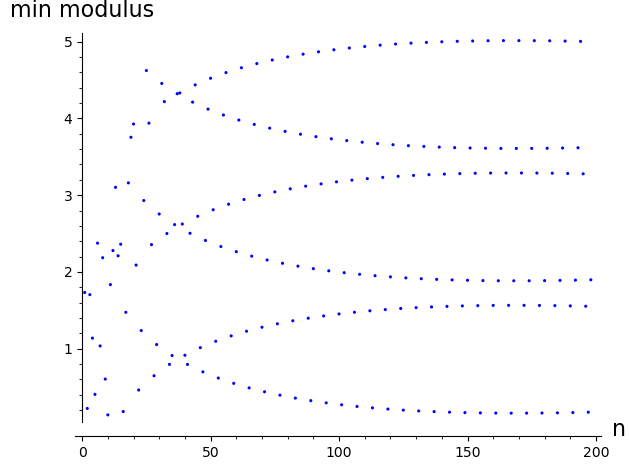

MINIMUM MODULI


In [16]:
import pickle
from sage.all import matrix, QQ, list_plot, ComplexField, text, Graphics
from datetime import datetime
from pathlib import Path
import sys
# -------------------------
# Paths and timestamped folder
# -------------------------
from sage.all import sigma, nth_prime
import pickle

from sage.all import ZZ, sigma

import pickle
with open('/Users/barrybrent/data/run28sept25no1.txt', 'rb') as rfile:
    j_list=pickle.load(rfile)
    
with open('/Users/barrybrent/data/run10sept25no20.txt', 'rb') as rfile:
    h_list = pickle.load(rfile)
    
with open('/Users/barrybrent/data/run28sept25no2.txt', 'rb') as rfile:
    cp_list=pickle.load(rfile)
    
cp_s=[pair[1] for pair in cp_list[1:]]

from sage.all import sigma, nth_prime

from sage.all import ZZ, sigma
from sage.all import *
precision_bits = 100
CIF = ComplexIntervalField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
checks=[]
for bound in range(1,199):
    print("n:",bound)
    cp=cp_s[bound]
    roots = cp.roots(ring=CIF, multiplicities=False)        # produces list of roots as Sage objects
    roots_list+=[(bound,roots)]
    centers=[r.center() for r in roots]
    pairs = [(z.real(), z.imag()) for z in centers]


    centers_list+=[(bound,centers)]
    max_diameter=max([r.diameter() for r in roots])
    max_diameter_list+=[(bound,max_diameter)]
    aar = [r.abs() for r in roots]
    aar_list+=[(bound,aar)]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)                                         # minimum modulus
        mins_list+=[(bound,minn)]
    
   
        
        
p_points = list_plot(mins_list, plotjoined=False, marker='o', size=5)  # points


p_points.axes_labels(['n', 'min modulus'])


p_points.show()
print("MINIMUM MODULI")
with open('/Users/barrybrent/data/run28sept25no3.txt', 'wb') as wfile:
    pickle.dump(matrix_list, wfile)
with open('/Users/barrybrent/data/run28sept25no4.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile)
with open('/Users/barrybrent/data/run28sept25no5.txt', 'wb') as wfile:
    pickle.dump(aar_list, wfile)
with open('/Users/barrybrent/data/run28sept25no6.txt', 'wb') as wfile:
    pickle.dump(centers_list, wfile)
with open('/Users/barrybrent/data/run28sept25no7.txt', 'wb') as wfile:
    pickle.dump(max_diameter_list, wfile)
with open('/Users/barrybrent/data/run28sept25no8.txt', 'wb') as wfile:
    pickle.dump(mins_list, wfile)
